## Consensus disorder prediction
This notebook takes the output from the [CAID prediction portal](https://caid.idpcentral.org/) (run using "Disorder" mode) and plots the overall disorder profiles for five of the top-performing predictors in the CAID2 challenge. Finally, discrete IDRs are identified ONLY using metapredict's IDR definition function.

NB: For large sets of sequences, we recommend using the [metapredict](https://colab.research.google.com/github/idptools/metapredict/blob/master/colab/metapredict_colab.ipynb) colab notebook or [locally-installable package](https://metapredict.readthedocs.io/en/latest/) (metapredict is also available as a [simple webserver](https://metapredict.net) for single sequences).



In [42]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


import metapredict as meta
import pandas as pd

In [51]:

# set the sequence used
seq = 'MSTGPSFSTKDNTLEYFVKASNKHGFSLDISLNVNGAVISGTMISAKEYFDYLSETFEEGSEVAQALSEQFSLASEASESNGEAEAHFIHLKNTKIYCGDSKSTPSKGKIFWRGKIAEVDGFFLGKISDAKSTSKKSS'

# Read the TSV file
df = pd.read_csv('CAID-4cd90fe1.tsv', delimiter='\t')

# excise out protein indices (we count from 1 as humans, not 0 as robots)
indx = np.arange(1,len(seq)+1)

Printing IDR boundaries and sequence
IDR: 1 - 8: MSTGPSFS
IDR: 130 - 138: AKSTSKKSS


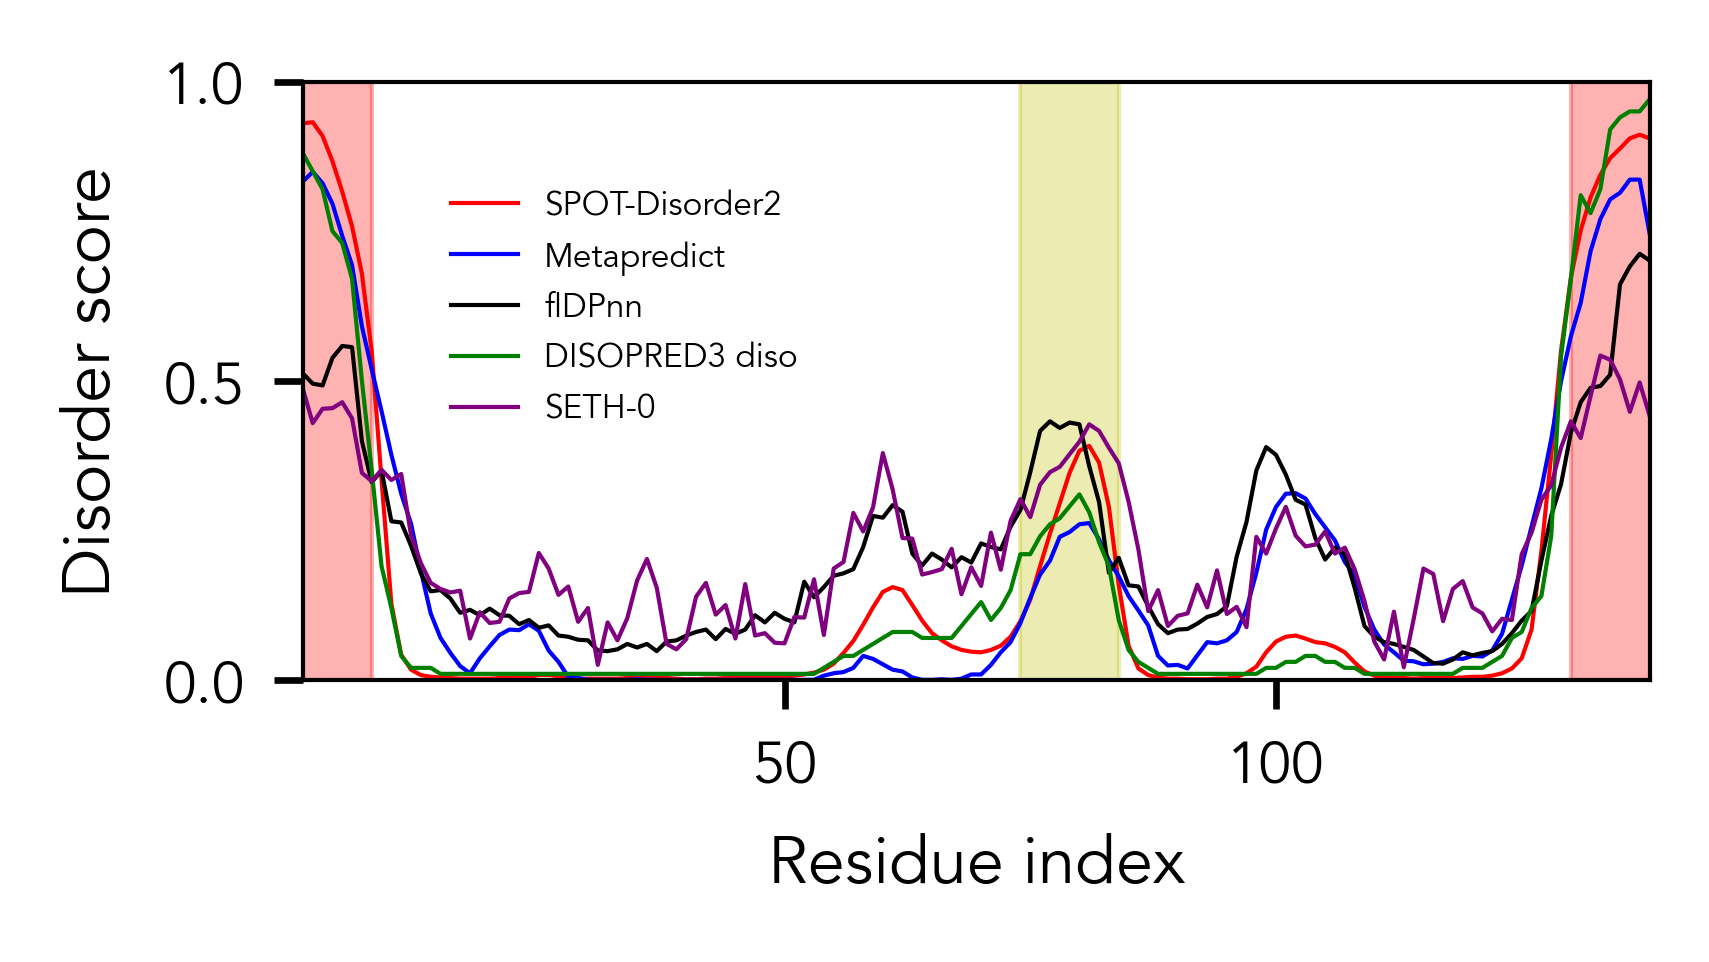

In [88]:
figure(num=None, figsize=(3, 1.7), dpi=300, facecolor='w', edgecolor='k')
ax = plt.gca()

plt.plot(indx, df['SPOT-Disorder2'].to_numpy(), color='r', linewidth=0.5, label='SPOT-Disorder2')
plt.plot(indx, df['Metapredict'].to_numpy(), color='b', linewidth=0.5, label='Metapredict')
plt.plot(indx, df['flDPnn'].to_numpy(), color='k', linewidth=0.5, label='flDPnn')
plt.plot(indx, df['DISOPRED3 diso'].to_numpy(), color='g', linewidth=0.5, label='DISOPRED3 diso')
plt.plot(indx, df['SETH_0'].to_numpy(), color='purple', linewidth=0.5, label='SETH-0')

plt.legend(fontsize=4,frameon=False, loc=(0.1,0.4))

idrs = meta.predict_disorder_domains(seq,minimum_IDR_size=3)

print('Printing IDR boundaries and sequence')
for d in idrs.disordered_domain_boundaries:
    ax.axvspan(d[0]+1,d[1], color='r', alpha=0.3, linewidth=0.5)
    print(f"IDR: {d[0]+1} - {d[1]}: {seq[d[0]:d[1]]}")


ax.axvspan(74, 84, color='y', alpha=0.3, linewidth=0.5)

plt.xlim(indx[0],indx[-1])    
plt.ylim(0,1)

plt.xlabel('Residue index', fontsize=8)
plt.xticks(fontsize=7)
    
plt.ylabel('Disorder score', fontsize=8)
plt.yticks(fontsize=7)

plt.tight_layout()

plt.savefig('disorder_profile.pdf')